In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Load the dataset
df = pd.read_csv('predictive_maintenance.csv')

# About the dataset
print(df.info())
print(df.describe())

# Skewness for detecting distribution asymmetry
print('\nSkewness:')
print(df.skew(numeric_only=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB
None
               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930

In [ ]:
print("numpy", np.__version__)
print("pandas", pd.__version__)
print("sklearn", sklearn.__version__)

numpy 2.0.2
pandas 2.2.2
sklearn 1.6.1


In [ ]:
# Filter only rows where machine failure occurred (i.e., Target = 1)
df_failure = df[df['Target'] == 1].copy()
df_failure = df_failure.drop(['Target', 'UDI', 'Product ID'], axis=1)

df_failure.head(10)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
50,L,298.9,309.1,2861,4.6,143,Power Failure
69,L,298.9,309.0,1410,65.7,191,Power Failure
77,L,298.8,308.9,1455,41.3,208,Tool Wear Failure
160,L,298.4,308.2,1282,60.7,216,Overstrain Failure
161,L,298.3,308.1,1412,52.3,218,Overstrain Failure
168,L,298.4,308.3,1433,62.3,20,Power Failure
194,M,298.2,308.5,2678,10.7,86,Power Failure
207,M,298.4,308.7,1421,60.7,119,Power Failure
242,L,298.0,308.2,1348,58.8,202,Overstrain Failure
248,L,298.0,308.3,1362,56.8,216,Overstrain Failure


Failure Type
Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
No Failure                    9
Name: count, dtype: int64


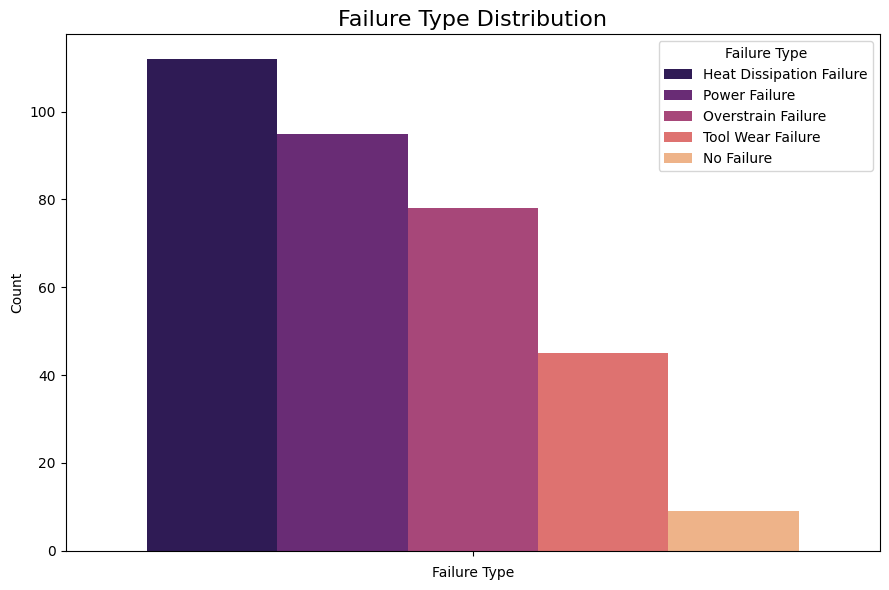

In [ ]:
# ------------ 1. EXPLORATORY DATA ANALYSIS (EDA) ------------ #

# Count of each failure type
failure_counts = df_failure['Failure Type'].value_counts()
print(failure_counts)

# Plotting count of each failure type
plt.figure(figsize=(9,6))
sns.barplot(hue=failure_counts.index, y=failure_counts.values, palette='magma')
plt.title('Failure Type Distribution', fontsize=16)
plt.xlabel('Failure Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

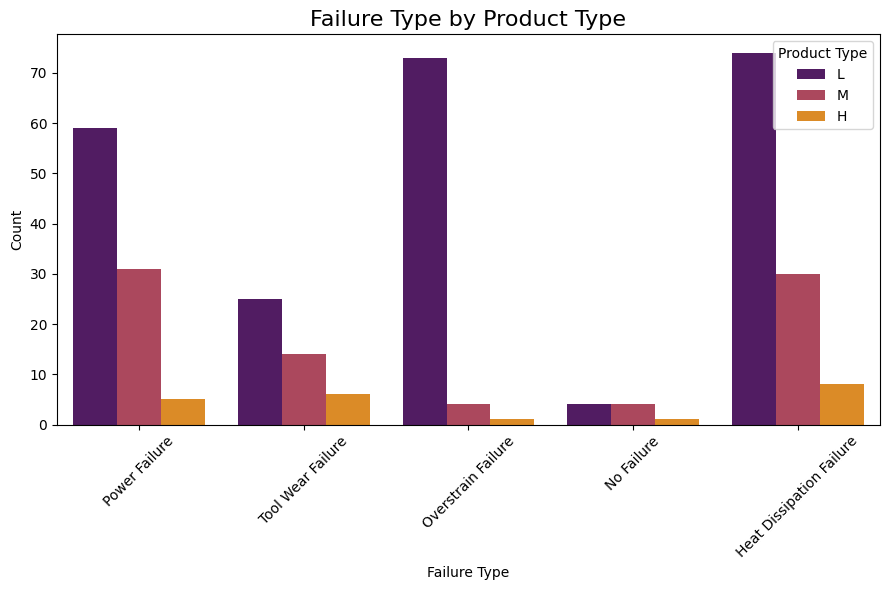

In [ ]:
# Visualizing failure type distribution by product type
plt.figure(figsize=(9,6))
sns.countplot(data=df_failure, x='Failure Type', hue='Type', palette='inferno')
plt.title('Failure Type by Product Type', fontsize=16)
plt.xlabel('Failure Type')
plt.ylabel('Count')
plt.legend(title='Product Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

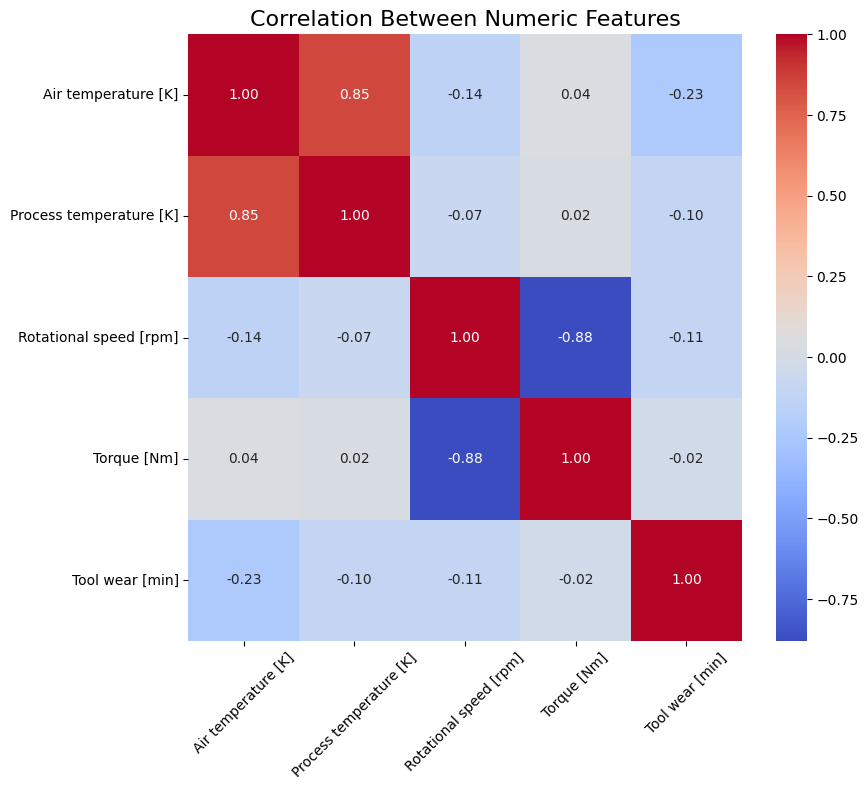

In [ ]:
# Select numerical columns for correlation analysis
numeric_cols = df_failure.select_dtypes(include=np.number).columns

# Correlation matrix
corr_matrix = df_failure[numeric_cols].corr()

plt.figure(figsize=(9,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Numeric Features', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

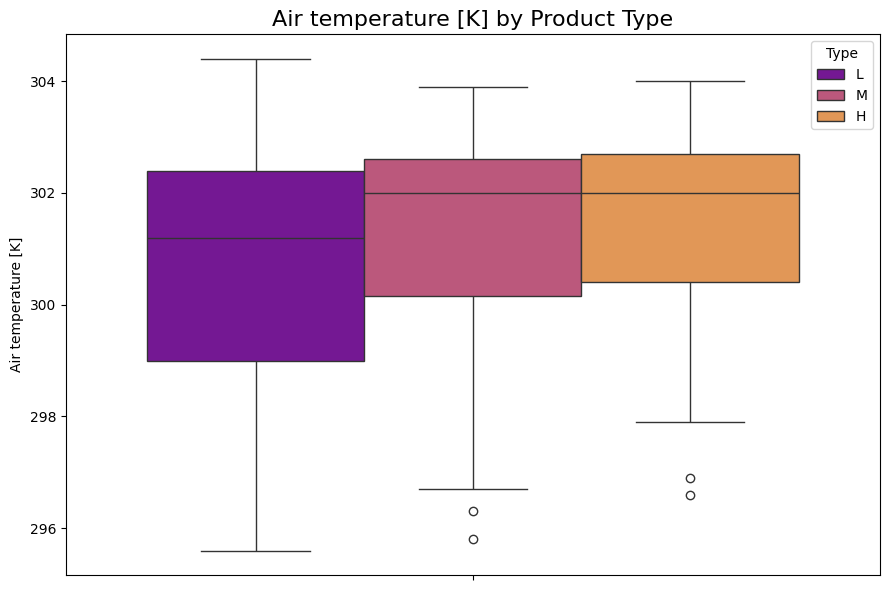

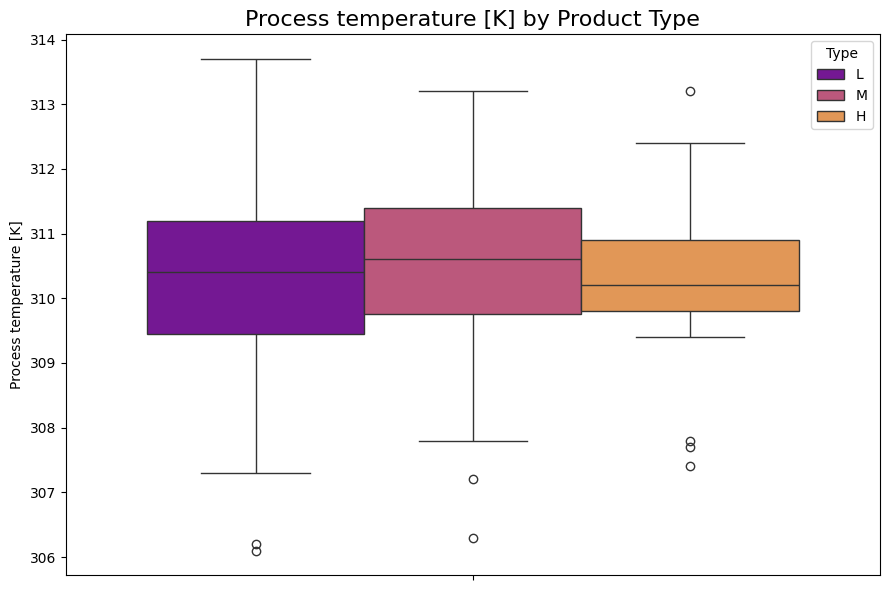

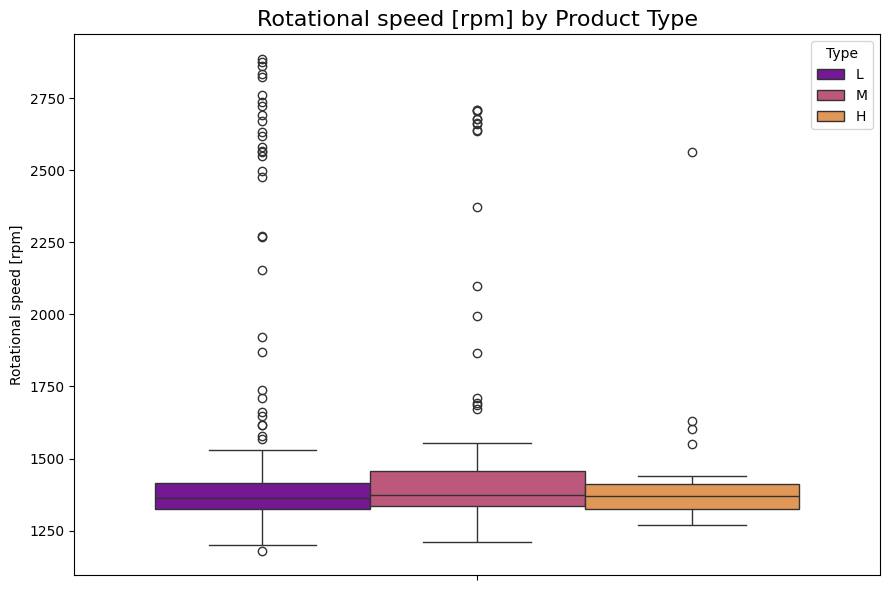

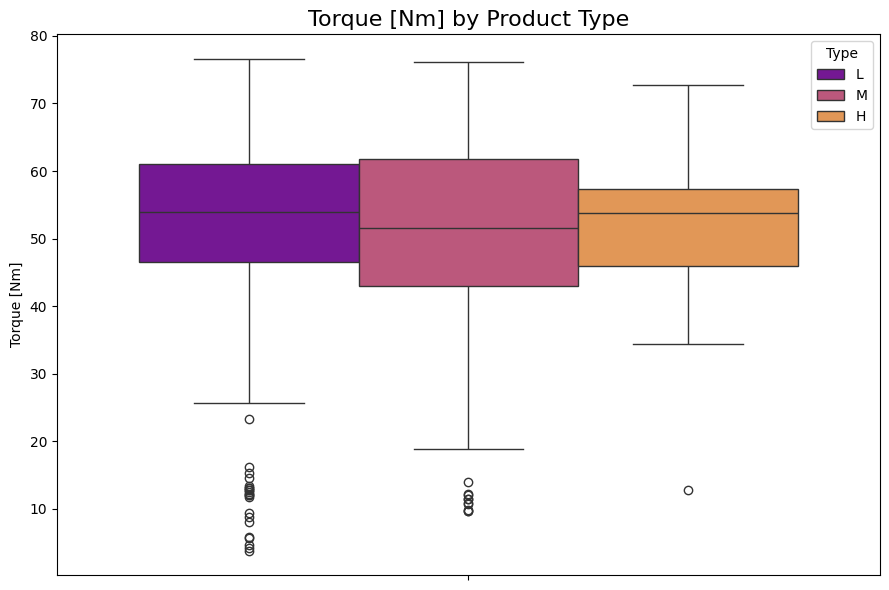

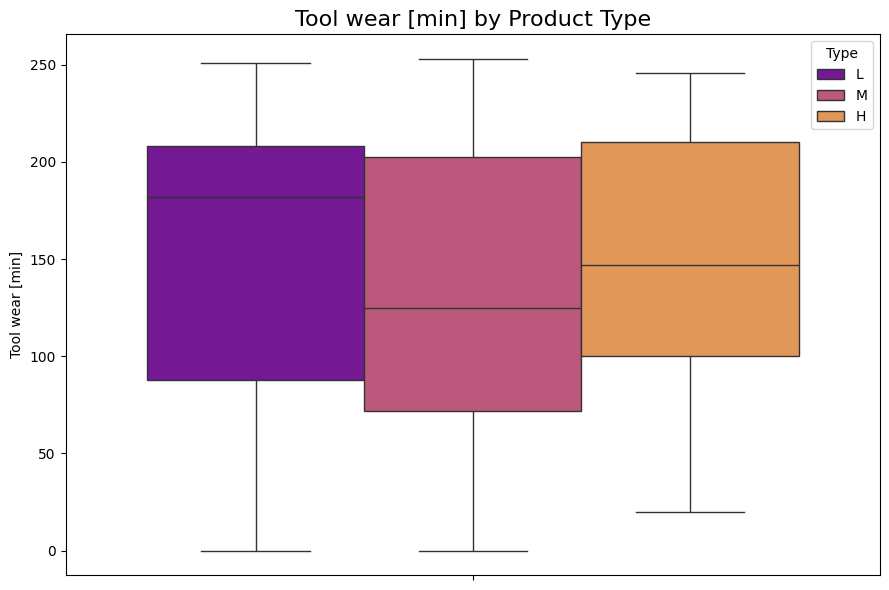

In [ ]:
sensor_readings = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Plotting sensor readings by product types
for feature in sensor_readings:
    plt.figure(figsize=(9,6))
    sns.boxplot(data=df_failure, hue='Type', y=feature, palette='plasma')
    plt.title(f'{feature} by Product Type', fontsize=16)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

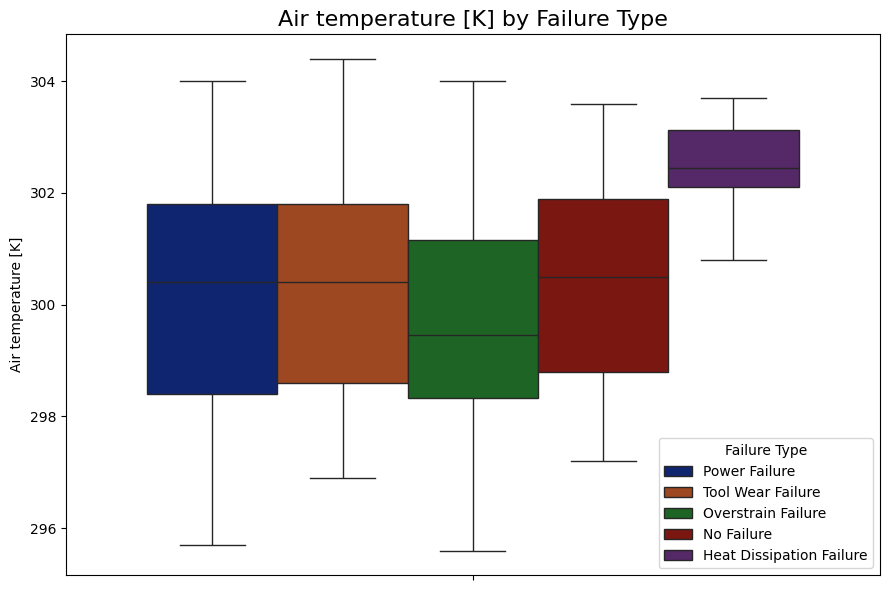

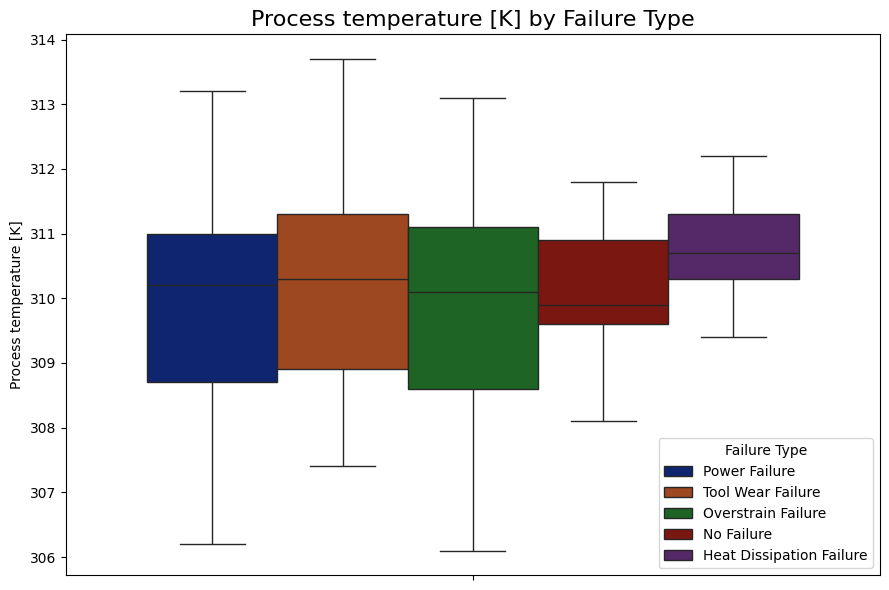

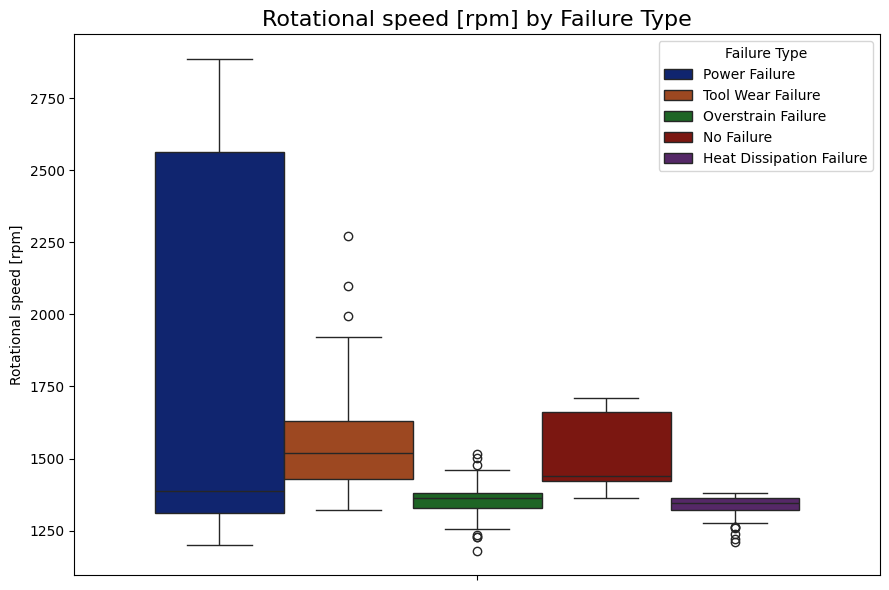

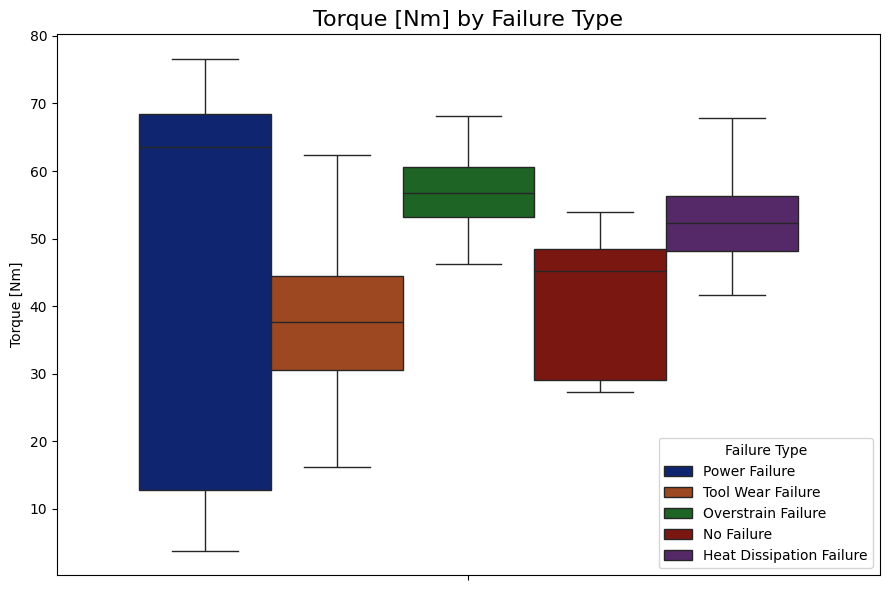

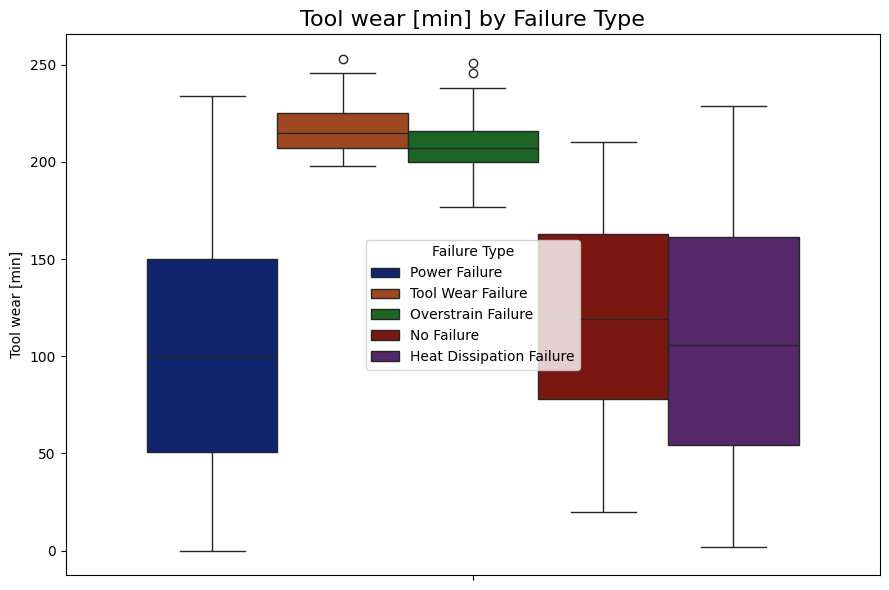

In [ ]:
# Plotting sensor readings by failure types
for feature in sensor_readings:
    plt.figure(figsize=(9,6))
    sns.boxplot(data=df_failure, hue='Failure Type', y=feature, palette='dark')
    plt.title(f'{feature} by Failure Type', fontsize=16)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

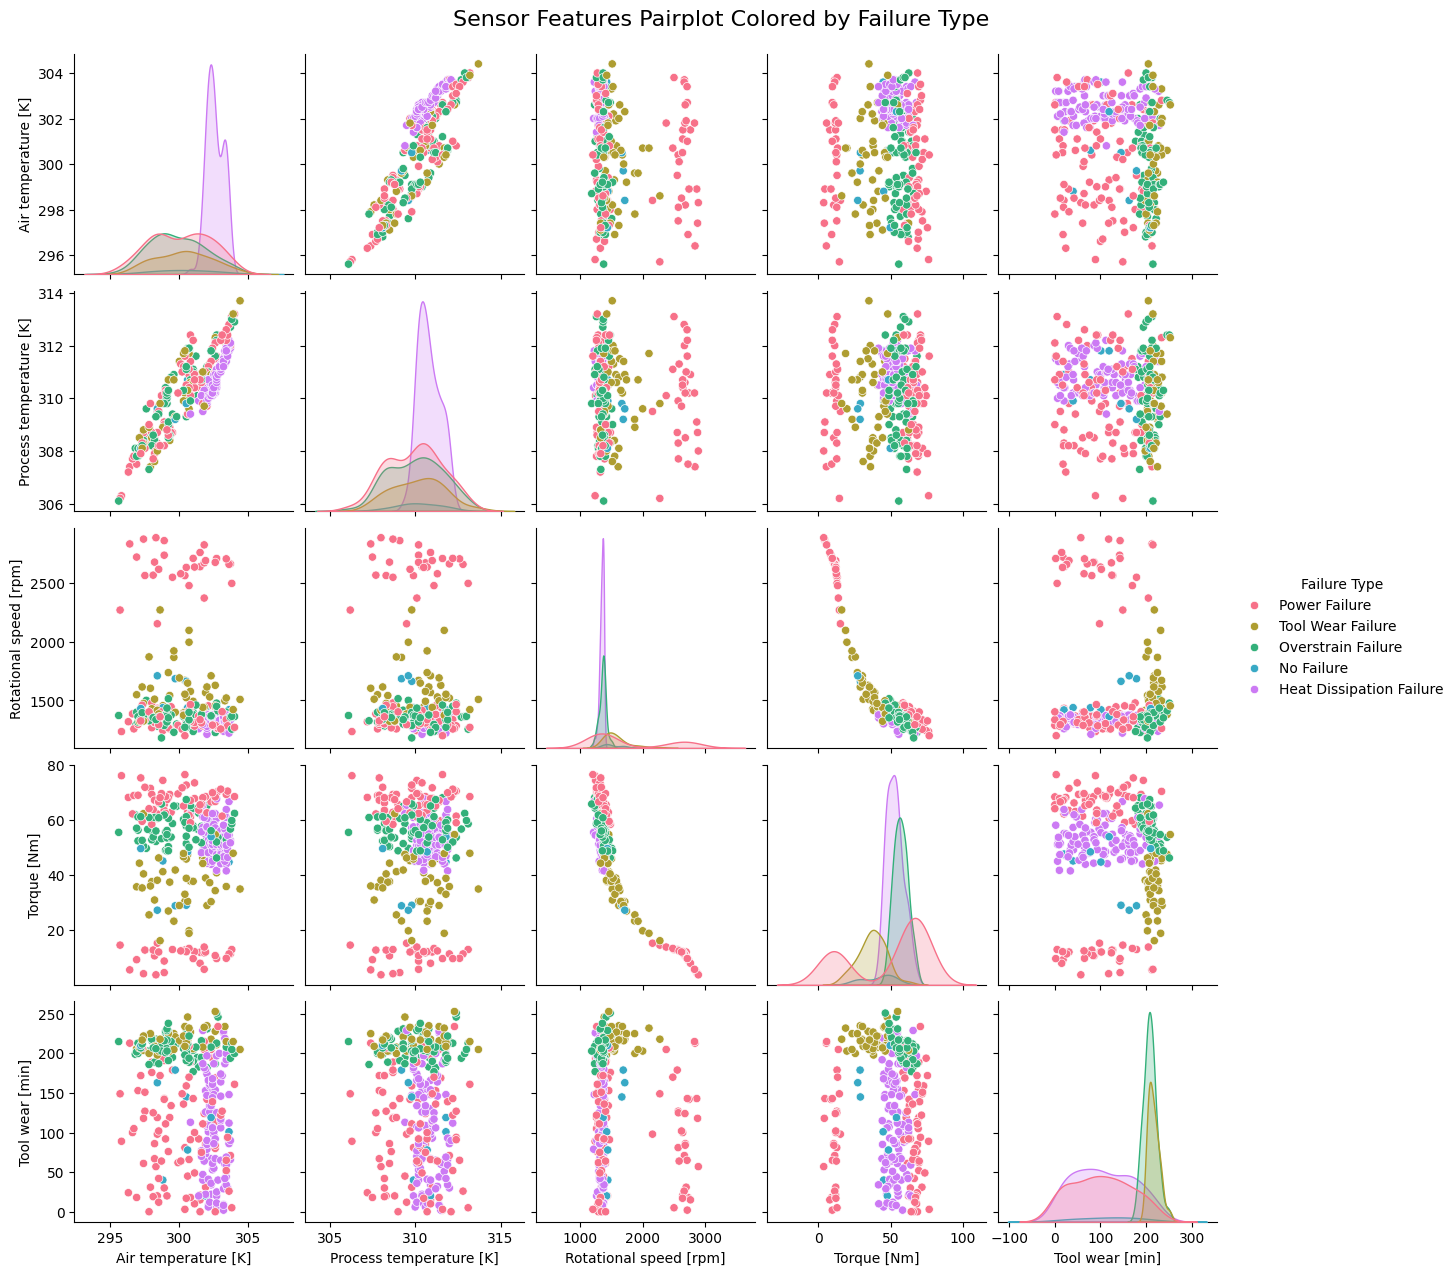

In [ ]:
sns.pairplot(df_failure, hue='Failure Type', vars=sensor_readings, palette='husl')
plt.suptitle("Sensor Features Pairplot Colored by Failure Type", fontsize=16, y=1.02)
plt.show()

In [ ]:
# ------------ 2. DATA PREPROCESSING ------------ #

# Checking for missing values
print('Missing values per column:')
print(df_failure.isnull().sum())

Missing values per column:
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Failure Type               0
dtype: int64


In [ ]:
# Splitting dataset into training and testing data
X = df_failure.iloc[:,:6]
y = df_failure.iloc[:,-1]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Encoding categorical feature (i.e., Type)
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[['L', 'M', 'H']])

# Fitting the encoder to training data
oe.fit(X_train.iloc[:,[0]])

# Transforming both training and testing data
X_train_encoded = oe.transform(X_train.iloc[:,[0]])
X_test_encoded = oe.transform(X_test.iloc[:,[0]])

X_train_encoded = pd.DataFrame(X_train_encoded, columns=X_train.iloc[:,[0]].columns)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=X_test.iloc[:,[0]].columns)

In [ ]:
# Standardizing the nummerical data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fitting scaler to training data
scaler.fit(X_train.iloc[:,1:])

# Transforming both training and testing data
X_train_scaled = scaler.transform(X_train.iloc[:,1:])
X_test_scaled = scaler.transform(X_test.iloc[:,1:])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.iloc[:,1:].columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.iloc[:,1:].columns)

In [ ]:
X_train_final = pd.concat([X_train_encoded, X_train_scaled], axis=1)
X_test_final = pd.concat([X_test_encoded, X_test_scaled], axis=1)

Random Forest Classification Report:

                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      0.86      0.92        21
              No Failure       1.00      0.67      0.80         3
      Overstrain Failure       0.77      1.00      0.87        17
           Power Failure       0.83      0.83      0.83        12
       Tool Wear Failure       1.00      0.93      0.97        15

                accuracy                           0.90        68
               macro avg       0.92      0.86      0.88        68
            weighted avg       0.91      0.90      0.90        68

Accuracy: 0.8970588235294118


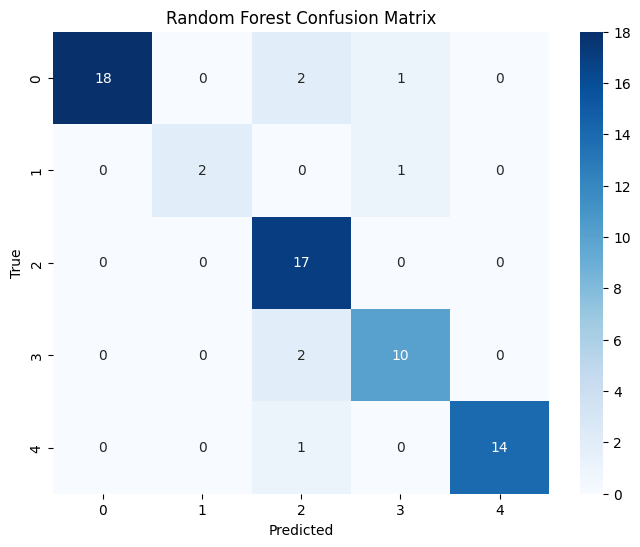

In [ ]:
# Using RandomForest to train the data
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

rf = RandomForestClassifier()

rf.fit(X_train_final, y_train)
y_pred = rf.predict(X_test_final)

# Evaluation
print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 10, 15, 20, None]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=10, verbose=2, n_jobs=-1)
grid_search.fit(X_train_final, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


Best parameters: {'max_depth': 10, 'n_estimators': 150}
Best score: 0.908068783068783


In [ ]:
import pickle
best_rf = grid_search.best_estimator_

with open('predictive_maintenance.pkl', 'wb') as file:
    pickle.dump(best_rf, file)

In [ ]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)